In [ ]:
import gdown
import zipfile
import os

# Define the URL and output file name
url = "https://drive.google.com/uc?id=1rF0YROnCTwebfASIZVV2CXycvckbk4OR"
output = "hindi.zip"

# Download the file
gdown.download(url, output, quiet=False)

# Extract the ZIP file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("valid")  # Extract to a directory named 'hin'


print("Extraction complete. Files are located in the 'hin' directory.")

Downloading...
From (original): https://drive.google.com/uc?id=1rF0YROnCTwebfASIZVV2CXycvckbk4OR
From (redirected): https://drive.google.com/uc?id=1rF0YROnCTwebfASIZVV2CXycvckbk4OR&confirm=t&uuid=731a281e-5aa8-4914-8e4a-da24c21035af
To: /content/hindi.zip
100%|██████████| 42.9M/42.9M [00:00<00:00, 54.8MB/s]


Extraction complete. Files are located in the 'hin' directory.


In [ ]:
import os
from os import listdir
from os.path import isfile, join

In [ ]:
def load(path):
    """Load a book from its file"""
    input_file = os.path.join(path)
    with open(input_file) as f:
        text = f.read()
    return text

In [ ]:
# Collect all of the book file names
path = '/content/valid/valid/'
book_files = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
# Load the books using the file names
books = []
for book in book_files:
    books.append(load(path+book))
type(books[0])

str

In [ ]:
# Compare the number of words in each book
for i in range(10):
    print("There are {} words in {}.".format(len(books[i].split()), book_files[i]))

There are 74 words in 149304.txt.
There are 630 words in 161053.txt.
There are 18 words in 26852.txt.
There are 42 words in 66161.txt.
There are 10 words in 81027.txt.
There are 15 words in 154370.txt.
There are 242 words in 73663.txt.
There are 21 words in 55762.txt.
There are 19 words in 149836.txt.
There are 41 words in 96073.txt.


In [ ]:
import re

def keep_hindi_words(text):
    '''Keep only Hindi words and remove everything else from the text'''
    # Regular expression to match Hindi characters
    hindi_pattern = re.compile(r'[^\u0900-\u097F\s]')

    # Remove non-Hindi characters
    text = hindi_pattern.sub('', text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text).strip()

    text = re.sub(r'[{}@_*>()\\#%+=\[\]\n\t॥ऽ]','', text)
    text = re.sub('a0','', text)
    text = re.sub('\'92t','\'t', text)
    text = re.sub('\'92s','\'s', text)
    text = re.sub('\'92m','\'m', text)
    text = re.sub('\'92ll','\'ll', text)
    text = re.sub('\'91','', text)
    text = re.sub('\'92','', text)
    text = re.sub('\'93','', text)
    text = re.sub('\'94','', text)
    text = re.sub('\.','', text)
    text = re.sub('\!','', text)
    text = re.sub('\?','', text)
    return text
clean_books = []
for book in books:
    clean_books.append(keep_hindi_words(book))
clean_books[0][:500]

'नीचे कुछ उदीयमान प्रौद्योगिकी की सूची दी गयी है। उदीयमान तकनीकें नवीन तकनीकें होती हैं इनमें तकनीकी जगत में उथलपुथल मचाने की क्षमता होती है ये पहले से जड़ जमायी तकनीकों को पिछाड सकती हैं। उदाहरण के लिये सूचना प्रौद्योगिकी ऐसी ही एक तकनीकी है जो पहले ही उथलपुथल कर चुकी है। इसी प्रकार कृत्रिम बुद्धि जो कि सूचना प्रौद्योगिकी के अन्दर ही आती है इसमें भी उथलपुथल करने की प्रबल क्षमता है।'

In [ ]:
import os

def save_books_to_files(clean_books, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, book in enumerate(clean_books):
        file_path = os.path.join(output_dir, f'book_{i+1}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(book)

# Example usage
output_directory = 'cleaned_books'
save_books_to_files(clean_books, output_directory)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

# Paths to your font files
hindi_font_path = '/content/NotoSansDevanagari-Regular.ttf'  # Font for Hindi
english_font_path = '/content/NotoSans-Regular.ttf'         # Font for English

# Create FontProperties objects
hindi_font_prop = FontProperties(fname=hindi_font_path)
english_font_prop = FontProperties(fname=english_font_path)

def plot_replacement_histogram(replacement_count):
    # Convert Counter to a DataFrame for Seaborn
    data = pd.DataFrame(replacement_count.items(), columns=['Suffix', 'Count'])

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Suffix', y='Count', data=data, color='skyblue')

    # Apply Hindi font to labels
    plt.xlabel('Suffixes', fontproperties=english_font_prop)
    plt.ylabel('Count of Replacements', fontproperties=english_font_prop)

    # Apply English font to title
    plt.title('Histogram of Suffix Replacements', fontproperties=english_font_prop)

    # Apply Hindi font to tick labels
    plt.xticks(rotation=45, fontproperties=hindi_font_prop)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import re
from collections import Counter

def count_words_in_files(directory):
    total_word_count = 0
    word_counter = Counter()

    # Process each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        if os.path.isfile(file_path) and filename.endswith('.txt'):
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()

                # Find all words using regex
                words = re.findall(r'\b\w+\b', content.lower())
                total_word_count += len(words)
                word_counter.update(words)

    unique_word_count = len(word_counter)
    return unique_word_count, total_word_count

# Example usage
directory = '/content/cleaned_books'  # Update this path as needed
unique_word_count, total_word_count = count_words_in_files(directory)

print(f"Unique Word Count: {unique_word_count}")
print(f"Total Word Count: {total_word_count}")


Unique Word Count: 23961
Total Word Count: 20617432


In [ ]:
def error1(text):
    suffix_replacements = {
        'ए': 'ये',
        'ई': 'यी',
        'उ': 'ऊ',
        'क': 'क्',
        'त': 'त्',
        'द': 'द्',
        'प': 'प्',
        'फ': 'फ्',
        'न्': 'न्'
    }

    replacement_count = Counter()  # Use Counter for automatic handling
    replaced_words = {}  # Dictionary to store original and replaced words

    def replace_suffix(match):
        nonlocal replacement_count
        word = match.group()
        for suffix, replacement in suffix_replacements.items():
            if word.endswith(suffix):
                # Store the original word and its replacement
                if word not in replaced_words:
                    replaced_words[word] = re.sub(re.escape(suffix) + r'$', replacement, word)
                replacement_count[suffix] += 1
                return replaced_words[word]
        return word

    # Process the text line by line
    lines = text.splitlines()
    modified_lines = []

    for line in lines:
        # Use a regular expression to find words and apply replacements
        modified_line = re.sub(r'\S+', replace_suffix, line)
        modified_lines.append(modified_line)

    modified_text = '\n'.join(modified_lines)
    unique_affected_word_count = len(replaced_words)

    return modified_text, replacement_count, replaced_words, unique_affected_word_count

def error2(text):
    replacements = {
        'र्द': 'रद',
        'ग्रे': 'गरे',
        'ज़ी': 'जि',
        'र्टी': 'रटी',
        'र्ड': 'रड',
        'ल्': 'ल',
        'र्य': 'रय',
        'ड': 'ढ',
        'श': 'स',
        'ु': 'ू',
        'ष': 'स',
        'ट्र': 'टर',
        'प्र': 'प्रर',
        'र्ट': 'रट',
        'द्ध': 'दध',
        'र्ण': 'रण',
        'ौ': 'ो'
    }

    replacement_count = Counter()
    modified_lines = []

    # Process each line separately
    lines = text.splitlines()
    for line in lines:
        words = line.split()
        modified_words = []
        for word in words:
            original_word = word
            for suffix, replacement in replacements.items():
                if suffix in word:
                    # Track the count of each replacement
                    replacement_count[suffix] += word.count(suffix)
                    # Replace all occurrences of the suffix in the word
                    new_word = re.sub(re.escape(suffix), replacement, word)
                    word = new_word
            modified_words.append(word)
        modified_lines.append(' '.join(modified_words))

    modified_text = '\n'.join(modified_lines)

    return modified_text, replacement_count, len(replacement_count)


<ipython-input-9-14363eb60eb0>:35: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
<ipython-input-9-14363eb60eb0>:35: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


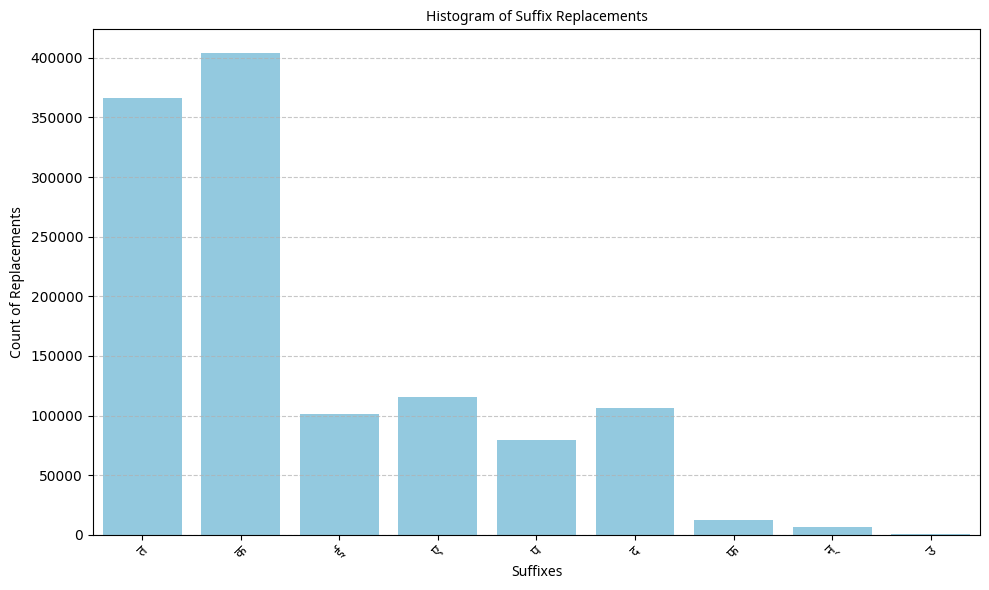

<ipython-input-9-14363eb60eb0>:35: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
<ipython-input-9-14363eb60eb0>:35: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


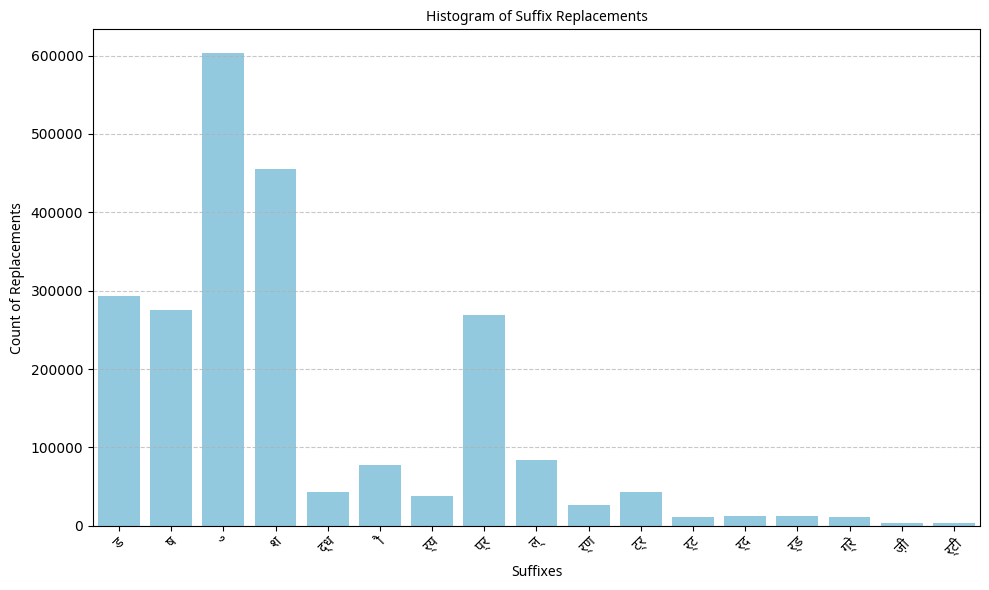

Total replacements by error1: 1192651
Total replacements by error2: 2265981


In [ ]:
import os
from collections import Counter

def process_files_sequentially(input_directory, intermediate_directory, final_directory):
    # Initialize Counters for replacements
    error1_replacement_count = Counter()
    error2_replacement_count = Counter()

    # Initialize total replacement counts
    total_replacements_error1 = 0
    total_replacements_error2 = 0

    # Ensure the intermediate and final directories exist
    os.makedirs(intermediate_directory, exist_ok=True)
    os.makedirs(final_directory, exist_ok=True)

    # Process files with error1
    for filename in os.listdir(input_directory):
        file_path = os.path.join(input_directory, filename)

        if os.path.isfile(file_path):
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()

            # Apply error1 function
            modified_content, replacement_count, _, _ = error1(content)
            error1_replacement_count.update(replacement_count)

            # Update total replacements for error1
            total_replacements_error1 += sum(replacement_count.values())

            # Define the path for the intermediate file
            intermediate_file_path = os.path.join(intermediate_directory, filename)

            # Write the intermediate content to the intermediate file
            with open(intermediate_file_path, 'w', encoding='utf-8') as file:
                file.write(modified_content)

    # Plot histogram for error1 replacements
    plot_replacement_histogram(error1_replacement_count)

    # Process files with error2
    for filename in os.listdir(intermediate_directory):
        file_path = os.path.join(intermediate_directory, filename)

        if os.path.isfile(file_path):
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()

            # Apply error2 function
            final_content, replacement_count, _ = error2(content)
            error2_replacement_count.update(replacement_count)

            # Update total replacements for error2
            total_replacements_error2 += sum(replacement_count.values())

            # Define the path for the final file
            final_file_path = os.path.join(final_directory, filename)

            # Write the final content to the final file
            with open(final_file_path, 'w', encoding='utf-8') as file:
                file.write(final_content)

    # Plot histogram for error2 replacements
    plot_replacement_histogram(error2_replacement_count)

    # Return total replaced words count
    return total_replacements_error1, total_replacements_error2

# Example usage
input_directory = '/content/cleaned_books'
intermediate_directory = '/content/intermediate_books'
final_directory = '/content/final_books'
total_replacements_error1, total_replacements_error2 = process_files_sequentially(input_directory, intermediate_directory, final_directory)

print(f"Total replacements by error1: {total_replacements_error1}")
print(f"Total replacements by error2: {total_replacements_error2}")


In [ ]:
unclean_files = [f for f in listdir(input_directory) if isfile(join(input_directory, f))]

In [ ]:
output_files = [f for f in listdir(output_directory) if isfile(join(output_directory, f))]

In [ ]:
input = []
for book in unclean_files:
    input.append(load(input_directory+'/' + book))

input[0]

'भूमंडलीय ऊष्मीकरण का अर्थ पृथ्वी की निकटस्थसतह वायु और महासागर के औसत तापमान में वीं शताब्दी से हो रही वृद्धि और उसकी अनुमानित निरंतरता है। पृथ्वी की सतह के निकट विश्व की वायु के औसत तापमान में तक वर्षों के दौरान की वृद्धि हुई है। जलवायु परिवर्तन पर बैठे अंतरसरकार पैनल ने निष्कर्ष निकाला है कि वीं शताब्दी के मध्य से संसार के औसत तापमान में जो वृद्धि हुई है उसका मुख्य कारण मनुष्य द्वारा निर्मित ग्रीनहाउस गैसें हैं।जैसा कि नाम से ही स्पष्ट है धरती के वातावरण के तापमान में लगातार हो रही विश्वव्यापी बढ़ोतरी को ग्लोबल वार्मिंग कहा जा रहा है। हमारी धरती सूर्य की किरणों से उष्मा प्राप्त करती है। ये किरणें वायुमंडल से गुजरती हुईं धरती की सतह से टकराती हैं और फिर वहीं से परावर्तित होकर पुन लौट जाती हैं। धरती का वायुमंडल कई गैसों से मिलकर बना है जिनमें कुछ ग्रीनहाउस गैसें भी शामिल हैं। इनमें से अधिकांश धरती के ऊपर एक प्रकार से एक प्राकृतिक आवरण बना लेती हैं जो लौटती किरणों के एक हिस्से को रोक लेता है और इस प्रकार धरती के वातावरण को गर्म बनाए रखता है। गौरतलब है कि मनुष्यों प्राणियों और पौधों के 

In [ ]:
output = []
for book in output_files:
    output.append(load(final_directory+'/'+book))

output[0][:500]

'भूमंढलीय ऊस्मीकरण का अर्थ पृथ्वी की निकटस्थसतह वायू और महासागर के औसत् तापमान में वीं सताब्दी से हो रही वृदधि और उसकी अनूमानित् निरंतरता है। पृथ्वी की सतह के निकट विस्व की वायू के औसत् तापमान में तक् वर्सों के दोरान की वृदधि हूयी है। जलवायू परिवर्तन पर बैठे अंतरसरकार पैनल ने निस्कर्स निकाला है कि वीं सताब्दी के मध्य से संसार के औसत् तापमान में जो वृदधि हूयी है उसका मूख्य कारण मनूस्य द्वारा निर्मित् ग्रीनहाउस गैसें हैं।जैसा कि नाम से ही स्पस्ट है धरती के वातावरण के तापमान में लगातार हो रही विस्वव'

In [ ]:
len(input), len(output)

(34456, 34456)

In [ ]:
clean = []
for book in input:
  clean.append(book.split('।'))
right = []
for lst in clean:
    right.extend(lst)

In [ ]:
un_clean = []
for book in output:
  un_clean.append(book.split('।'))
wrong = []
for lst in un_clean:
    wrong.extend(lst)

In [ ]:
correct = []
incorrect = []
for i in range(len(right)):
  if(right[i] != wrong[i]):
    correct.append(right[i])
    incorrect.append(wrong[i])

In [ ]:
print(correct[0])
print(incorrect[0])

भूमंडलीय ऊष्मीकरण का अर्थ पृथ्वी की निकटस्थसतह वायु और महासागर के औसत तापमान में वीं शताब्दी से हो रही वृद्धि और उसकी अनुमानित निरंतरता है
भूमंढलीय ऊस्मीकरण का अर्थ पृथ्वी की निकटस्थसतह वायू और महासागर के औसत् तापमान में वीं सताब्दी से हो रही वृदधि और उसकी अनूमानित् निरंतरता है


In [ ]:
import pandas as pd
# Create a DataFrame
lines = pd.DataFrame({
    'source': incorrect,
    'target' : correct
})

In [ ]:
lines.shape

(493703, 2)

In [ ]:
lines=lines.drop_duplicates()
lines.shape

(379092, 2)

In [ ]:
lines

,source,target
0,भूमंढलीय ऊस्मीकरण का अर्थ पृथ्वी की निकटस्थसतह...,भूमंडलीय ऊष्मीकरण का अर्थ पृथ्वी की निकटस्थसतह...
1,पृथ्वी की सतह के निकट विस्व की वायू के औसत् त...,पृथ्वी की सतह के निकट विश्व की वायु के औसत ता...
2,जलवायू परिवर्तन पर बैठे अंतरसरकार पैनल ने निस...,जलवायु परिवर्तन पर बैठे अंतरसरकार पैनल ने निष...
3,जैसा कि नाम से ही स्पस्ट है धरती के वातावरण के...,जैसा कि नाम से ही स्पष्ट है धरती के वातावरण के...
4,हमारी धरती सूरय की किरणों से उस्मा प्रराप्त् ...,हमारी धरती सूर्य की किरणों से उष्मा प्राप्त क...
...,...,...
493698,यह ढायरी कयी नाटकों और फिलमों की बूनियाद् बनी,यह डायरी कई नाटकों और फिल्मों की बुनियाद बनी
493699,ऐन फ्रैंक् को उसकी लेखनी की गूणवत्ता और होलोक...,ऐन फ्रैंक को उसकी लेखनी की गुणवत्ता और होलोकॉ...
493700,वह उन लाख यहूदी बच्चों में से थी जिन्हें होलो...,वह उन लाख यहूदी बच्चों में से थी जिन्हें होलो...
493701,कूमार गंधर्व के नाम से प्ररसिदध सिवपूत्र सिदधर...,कुमार गंधर्व के नाम से प्रसिद्ध शिवपुत्र सिद्ध...


In [ ]:
lines['source']=lines['source'].apply(lambda x: x.strip())
lines['target']=lines['target'].apply(lambda x: x.strip())

In [ ]:
lines.to_csv("data_sentence.csv", index = False)

In [ ]:
lines.describe()

,source,target
count,10000,10000
unique,9996,9996
top,सम्बंधित् जनगणना कोढ राज्य कोढ जिला कोढ तहसील कोढ,सम्बंधित जनगणना कोड राज्य कोड जिला कोड तहसील कोड
freq,2,2


In [ ]:
lines.to_csv("data_sentence.csv", index = False)

In [ ]:
# Add start and end tokens to target sequences
lines['target']=lines['target'].apply(lambda x : '\t'+ x + '\n')

In [ ]:
lines['length_source']=lines['source'].apply(lambda x:len(x.split(" ")))
lines['length_target']=lines['target'].apply(lambda x:len(x.split(" ")))

In [ ]:
# lines = lines.drop(['correct_tokens', 'incorrect_tokens'], inplace = True, axis = 1)
lines

,source,target,length_source,length_target
0,हाँ मैंने भी प्यार किया की धर्मेस दर्सन द्वारा...,\tहाँ मैंने भी प्यार किया की धर्मेश दर्शन द्वा...,16,16
1,इसमें अभिसेक् बच्चन करिस्मा कपूर और अक्सय कूमा...,\tइसमें अभिषेक बच्चन करिश्मा कपूर और अक्षय कुम...,11,11
2,जिस समय फिलम बनायी गयी थी अभिसेक् और करिस्मा ढ...,\tजिस समय फिल्म बनाई गई थी अभिषेक और करिश्मा ड...,13,13
3,फिलम का संगीत् नदीमस्रवण द्वारा रचित् किया गया था,\tफिल्म का संगीत नदीमश्रवण द्वारा रचित किया गय...,9,9
4,कहानी सिव और पूजा के साथ सूरू होती है जो नोकरी...,\tकहानी शिव और पूजा के साथ शुरू होती है जो नौक...,15,15
...,...,...,...,...
493698,में कानून सचिव के रूप् में कारयकाल समाप्त् होन...,\tमें कानून सचिव के रूप में कार्यकाल समाप्त हो...,22,22
493699,में उन्होंने में कानून आयोग के अध्यक्स बनने के...,\tमें उन्होंने में कानून आयोग के अध्यक्ष बनने ...,22,22
493700,उस भूमिका को छोढ़कर में उन्होंने फिर से सीमा म...,\tउस भूमिका को छोड़कर में उन्होंने फिर से सीमा...,32,32
493701,प्रराकृतिक् कारणों से नयी दिलली में सितंबर को ...,\tप्राकृतिक कारणों से नई दिल्ली में सितंबर को ...,13,13


In [ ]:
lines

,source,target,length_source,length_target
0,हाँ मैंने भी प्यार किया की धर्मेस दर्सन द्वारा...,\tहाँ मैंने भी प्यार किया की धर्मेश दर्शन द्वा...,16,16
1,इसमें अभिसेक् बच्चन करिस्मा कपूर और अक्सय कूमा...,\tइसमें अभिषेक बच्चन करिश्मा कपूर और अक्षय कुम...,11,11
2,जिस समय फिलम बनायी गयी थी अभिसेक् और करिस्मा ढ...,\tजिस समय फिल्म बनाई गई थी अभिषेक और करिश्मा ड...,13,13
3,फिलम का संगीत् नदीमस्रवण द्वारा रचित् किया गया था,\tफिल्म का संगीत नदीमश्रवण द्वारा रचित किया गय...,9,9
4,कहानी सिव और पूजा के साथ सूरू होती है जो नोकरी...,\tकहानी शिव और पूजा के साथ शुरू होती है जो नौक...,15,15
...,...,...,...,...
493698,में कानून सचिव के रूप् में कारयकाल समाप्त् होन...,\tमें कानून सचिव के रूप में कार्यकाल समाप्त हो...,22,22
493699,में उन्होंने में कानून आयोग के अध्यक्स बनने के...,\tमें उन्होंने में कानून आयोग के अध्यक्ष बनने ...,22,22
493700,उस भूमिका को छोढ़कर में उन्होंने फिर से सीमा म...,\tउस भूमिका को छोड़कर में उन्होंने फिर से सीमा...,32,32
493701,प्रराकृतिक् कारणों से नयी दिलली में सितंबर को ...,\tप्राकृतिक कारणों से नई दिल्ली में सितंबर को ...,13,13


In [ ]:
lines = lines[(lines['length_source'] >= 2) & (lines['length_source'] <= 10)]

In [ ]:
lines.shape

(71434, 4)

In [ ]:
lines.drop(['length_source', 'length_target'], inplace = True, axis = 1)

<ipython-input-49-424c3ebbd818>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines.drop(['length_source', 'length_target'], inplace = True, axis = 1)


In [ ]:
lines.shape

(71434, 2)

In [ ]:
### Get English and Tamil Vocabulary
all_eng_words=set()
for eng in lines['source']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_tamil_words=set()
for tam in lines['target']:
    for word in tam.split():
        if word not in all_tamil_words:
            all_tamil_words.add(word)

In [ ]:
len(all_eng_words)

280912

In [ ]:
len(all_tamil_words)

287752

In [ ]:
lines['length_source']=lines['source'].apply(lambda x:len(x.split(" ")))
lines['length_target']=lines['target'].apply(lambda x:len(x.split(" ")))

In [ ]:
lines.head()

,source,target,length_source,length_target
0,एस एस भूसनूरमठ कन्नढ़ भासा के विख्यात् साहित्य...,START_ एस एस भुसनूरमठ कन्नड़ भाषा के विख्यात स...,9,11
1,इनके द्वारा रचित् एक् टीका सून्यसंपादनेय परामर...,START_ इनके द्वारा रचित एक टीका शून्यसंपादनेय ...,19,21
2,दक्सिणी भारत् के निवासी हैं,START_ दक्षिणी भारत के निवासी हैं _END,5,7
3,यह लोग तमिल मलयालम तेलूगू और कन्नढ जेसी भासाएँ...,START_ यह लोग तमिल मलयालम तेलुगु और कन्नड जेसी...,14,16
4,खटिक् भारत् में पायी जाने वाली एक् जाति है,START_ खटिक भारत में पायी जाने वाली एक जाति है...,9,11


In [ ]:
lines[lines['length_source']>10].shape

(307504, 4)

In [ ]:
lines=lines[lines['length_source']>=10]
lines=lines[lines['length_target']>=10]

In [ ]:
lines=lines[lines['length_source']<92]
lines=lines[lines['length_target']<92]

In [ ]:
lines.shape

(322615, 4)

In [ ]:
print("maximum length of Tamil Sentence ",max(lines['length_target']))
print("maximum length of English Sentence ",max(lines['length_source']))

maximum length of Tamil Sentence  91
maximum length of English Sentence  89


In [ ]:
max_length_tar=max(lines['length_target'])
max_length_src=max(lines['length_source'])

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)